In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\boodm\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
p1 = ( 1., 1.)
p2 = ( 7., 7.)

# 식
y = ax + b<br>
# 행렬식
[y1] = [x1 1] [a]<br>
[y2] = [x2 1] [b]
# 풀이
X_inverse Y = ab

In [3]:
X = [ [ p1[0], 1 ],
      [ p2[0], 1 ] ]
Y = [ [ p1[1] ],
      [ p2[1] ] ]

In [4]:
ab = tf.matmul(tf.matrix_inverse(X), Y)

In [5]:
with tf.Session() as session:
    ab_cpu = session.run(ab)

In [6]:
ab_cpu

array([[ 1.0000001e+00],
       [-1.1920929e-07]], dtype=float32)

In [7]:
a = ab_cpu[0]
b = ab_cpu[1]
print("Equation: y = {a}x + {b}".format(a=a, b=b))

Equation: y = [1.0000001]x + [-1.1920929e-07]


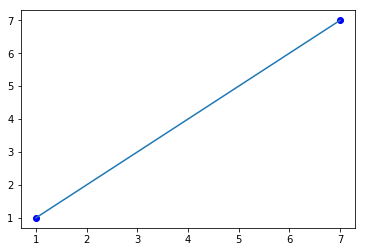

In [8]:
plt.plot([p1[0], p2[0]], [p1[1],p2[1]], 'bo')
plt.plot([p1[0], a*p2[0]+b], [p1[1],a*p2[1]+b])
plt.show()

In [9]:
x = [ 0., 5., 0.]
y = [ 0., 5., 3.]
x = np.array(x)
y = np.array(y)

# 식
(x-a)<sup>2</sup> + (y-b)<sup>2</sup> = r<sup>2</sup> <br>
x<sup>2</sup> -2ax + a<sup>2</sup>+ y<sup>2</sup> -2by + b<sup>2</sup>= r<sup>2</sup><br>
x<sup>2</sup> + y<sup>2</sup> + dx + ey + f = 0 <br>
# 행렬식
[ x1 y1 1 ] [ d ] = [ - x1<sup>2</sup> - y1<sup>2</sup>]<br>
[ x2 y2 1 ] [ e ] = [ - x2<sup>2</sup> - y2<sup>2</sup>]<br>
[ x3 y3 1 ] [ f ] = [ - x3<sup>2</sup> - y3<sup>2</sup>]<br>

In [10]:
A = np.concatenate( (x.reshape(-1,1), y.reshape(-1,1), [[1.], [1.], [1.]]), axis=1)

In [11]:
B = -(x * x + y * y).reshape(-1,1)

In [12]:
def_mat = tf.matmul(tf.matrix_inverse(A), B)

In [13]:
with tf.Session() as session:
    def_cpu = session.run(def_mat)

In [14]:
d,e,f = def_cpu

# 식
x<sup>2</sup> -2ax + a<sup>2</sup>+ y<sup>2</sup> -2by + b<sup>2</sup>= r<sup>2</sup><br>
x<sup>2</sup> + y<sup>2</sup> + dx + ey + f = 0 <br>
a = -d/2, b = -e/2, r<sup>2</sup> = a<sup>2</sup>+b<sup>2</sup>-f

In [15]:
a = -d/2
b = -e/2
r = np.sqrt(a*a + b*b - f)

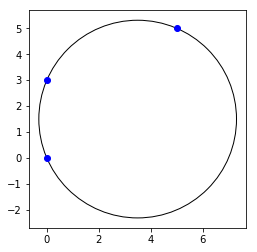

In [16]:
circle=plt.Circle((a,b),r, fill=False)
ax=plt.gca()
ax.add_patch(circle)
plt.plot(x, y, 'bo')
plt.axis('scaled')
plt.show()
